# Preprocesamiento de datos - Parte 1

En este documento, se presentarán algunas funciones útiles y metodologías ampliamente utilizadas para el procesamiento de información antes del análisis de datos o ciencia de datos.


In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Comenzaremos importando nuestros datos de censo de población y vivienda 2020, en formato de microdatos. Al importar la información, notamos que todas las filas son de tipo objeto, lo que indica que no se ha realizado ningún análisis hasta el momento.

In [2]:
personas = pd.read_csv("https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CPV_CB_Personas_ejemplo_csv.zip",dtype=str)
personas


,ENT,MUN,LOC,AGEB,MZA,SEG,ID_VIV,ID_PERSONA,TIPO_REG,CLASE_VIV,...,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,CONACT,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,TAMLOC,TAMLOC14
0,21,108,0001,0017,001,N,211080000005,21108000000500001,0,02,...,15,021,108,NaN,8,10,NaN,NaN,5,13
1,21,108,0001,0017,001,N,211080000005,21108000000500003,0,02,...,5,023,009,0301,5,80,11,0,5,13
2,21,108,0001,0017,001,N,211080000005,21108000000500002,0,02,...,3,023,009,0301,5,80,NaN,NaN,5,13
3,14,086,0001,0017,003,N,140860001428,14086000142800003,0,03,...,NaN,014,086,NaN,NaN,NaN,NaN,NaN,5,13
4,14,086,0001,0017,003,N,140860001428,14086000142800001,0,03,...,9,014,086,NaN,1,10,1,0,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257501,14,065,0017,0049,800,N,140650001652,14065000165200004,0,01,...,6,014,065,NaN,8,50,0,NaN,1,01
1257502,14,009,0020,0053,800,N,140090000378,14009000037800001,0,01,...,1,014,009,NaN,2,10,NaN,NaN,1,01
1257503,21,210,0037,0034,002,N,212100000299,21210000029900003,0,01,...,1,021,210,NaN,NaN,NaN,NaN,NaN,1,01
1257504,21,210,0037,0034,002,N,212100000299,21210000029900002,0,01,...,6,021,210,NaN,7,60,1,0,1,01


In [3]:
list(personas.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

## Selección

Una tarea común es seleccionar los datos que se utilizarán en nuestro análisis. Para ello, Pandas ofrece herramientas muy intuitivas para seleccionar filas. Además, podemos realizar conversiones en el formato de  de la columna para adaptarla mejor a nuestras necesidades.

In [4]:
personas_interes = personas.loc[:,["ID_PERSONA","SEXO","PARENT"]]
personas_interes.loc[:,"EDAD"] = personas.loc[:,"EDAD"].astype(int)
personas_interes.loc[:,"ESCOACUM"] = personas.loc[:,"ESCOACUM"].astype(float)
personas_interes

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
0,21108000000500001,1,01,35,15.0
1,21108000000500003,3,06,66,5.0
2,21108000000500002,1,06,78,3.0
3,14086000142800003,3,03,2,NaN
4,14086000142800001,3,01,18,9.0
...,...,...,...,...,...
1257501,14065000165200004,3,03,12,6.0
1257502,14009000037800001,1,01,85,1.0
1257503,21210000029900003,1,03,7,1.0
1257504,21210000029900002,3,02,38,6.0


In [5]:
personas_interes.dtypes

ID_PERSONA     object
SEXO           object
PARENT         object
EDAD            int64
ESCOACUM      float64
dtype: object

Una manera sencilla de seleccionar filas de interés en una tabla es utilizando la función query(), que acepta un filtro similar al utilizado en sentencias SQL. 

In [6]:
personas_interes_2 = personas_interes.query("EDAD > 18")
personas_interes_2

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
0,21108000000500001,1,01,35,15.0
1,21108000000500003,3,06,66,5.0
2,21108000000500002,1,06,78,3.0
5,14086000142800002,1,02,21,9.0
6,14044000020100001,1,01,28,9.0
...,...,...,...,...,...
1257499,14065000165200002,3,02,45,9.0
1257500,14065000165200001,1,01,46,6.0
1257502,14009000037800001,1,01,85,1.0
1257504,21210000029900002,3,02,38,6.0


También hay ocasiones en las que es conveniente realizar una muestra aleatoria de la tabla completa para reducir los costos computacionales en pruebas.

In [7]:
personas_interes_3 = personas_interes.sample(frac=0.1)
personas_interes_3

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
1088013,14117000041900003,1,04,21,9.0
168585,21117000027300003,1,03,8,2.0
565852,14076000006300001,3,01,63,14.0
704716,21079000038100006,1,08,0,NaN
113191,21077000061000002,3,03,29,15.0
...,...,...,...,...,...
443267,14025000031800003,1,03,40,6.0
112647,14082000129500003,1,03,36,11.0
127714,14035000019100010,1,04,0,NaN
604121,14009000159900001,1,01,38,9.0


## Tratamiento de valores faltantes

Con Pandas, podemos eliminar los registros que contengan valores faltantes o restringirnos solo a las columnas en las que se presenten.

In [8]:
personas_interes_4 = personas_interes.dropna(subset="PARENT")  ## Na en columna PARENT
personas_interes_4

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
0,21108000000500001,1,01,35,15.0
1,21108000000500003,3,06,66,5.0
2,21108000000500002,1,06,78,3.0
3,14086000142800003,3,03,2,NaN
4,14086000142800001,3,01,18,9.0
...,...,...,...,...,...
1257501,14065000165200004,3,03,12,6.0
1257502,14009000037800001,1,01,85,1.0
1257503,21210000029900003,1,03,7,1.0
1257504,21210000029900002,3,02,38,6.0


 También es posible insertar datos en los valores faltantes, ya sea utilizando un valor fijo para todos los faltantes o una lista detallada de valores.


In [9]:
escolaridad_media = round(personas_interes["ESCOACUM"].mean())
escolaridad_media

9

In [10]:
personas_interes_5 =  personas_interes.fillna({"ESCOACUM":escolaridad_media})
personas_interes_5

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
0,21108000000500001,1,01,35,15.0
1,21108000000500003,3,06,66,5.0
2,21108000000500002,1,06,78,3.0
3,14086000142800003,3,03,2,9.0
4,14086000142800001,3,01,18,9.0
...,...,...,...,...,...
1257501,14065000165200004,3,03,12,6.0
1257502,14009000037800001,1,01,85,1.0
1257503,21210000029900003,1,03,7,1.0
1257504,21210000029900002,3,02,38,6.0


In [11]:
personas_interes_6 = personas_interes.copy()
personas_interes_6['ESCOACUM'] = personas_interes_6['ESCOACUM'].fillna(personas_interes.groupby('PARENT')['ESCOACUM'].transform('mean'))
personas_interes_6

,ID_PERSONA,SEXO,PARENT,EDAD,ESCOACUM
0,21108000000500001,1,01,35,15.000000
1,21108000000500003,3,06,66,5.000000
2,21108000000500002,1,06,78,3.000000
3,14086000142800003,3,03,2,7.958085
4,14086000142800001,3,01,18,9.000000
...,...,...,...,...,...
1257501,14065000165200004,3,03,12,6.000000
1257502,14009000037800001,1,01,85,1.000000
1257503,21210000029900003,1,03,7,1.000000
1257504,21210000029900002,3,02,38,6.000000



Además, es posible interpolar el valor del elemento más cercano utilizando funciones como la interpolación lineal, cuadrática, entre otras.




In [17]:
personas_interes_7 = personas_interes.copy().sort_values(["SEXO","PARENT","EDAD"])

print(personas_interes_7.isna().sum())

personas_interes_7["ESCOACUM"] = personas_interes_7["ESCOACUM"].interpolate('nearest') ## Inputar por vecino más cercano
personas_interes_7.isna().sum()
#personas_interes_7.sort_index()


ID_PERSONA        0
SEXO              0
PARENT         3628
EDAD              0
ESCOACUM      57819
dtype: int64


ID_PERSONA       0
SEXO             0
PARENT        3628
EDAD             0
ESCOACUM         0
dtype: int64

## Tratamiento de valores atípicos

Comenzaremos generando una distribución de valores relacionados, como el conteo de viviendas y personas por clave de localidad. Es importante tener en cuenta que aquí no se incluye ni el municipio ni la entidad, por lo que localidades de distintos municipios se tratarán como una sola si comparten la misma clave de localidad.


In [13]:
conteos = personas.groupby(["LOC"])[["ID_VIV","ID_PERSONA"]].nunique()
conteos

,ID_VIV,ID_PERSONA
LOC,,
0001,233568,813073
0002,3070,11450
0003,3425,12867
0004,2297,8761
0005,2675,10027
...,...,...
5683,1,6
5695,1,2
5704,1,1


Al analizar el gráfico, encontramos que hay un elemento con conteos muy superiores: la clave "01" que se utiliza por defecto, lo que provoca que sus conteos sean mucho mayores. 



<AxesSubplot: xlabel='ID_VIV', ylabel='ID_PERSONA'>

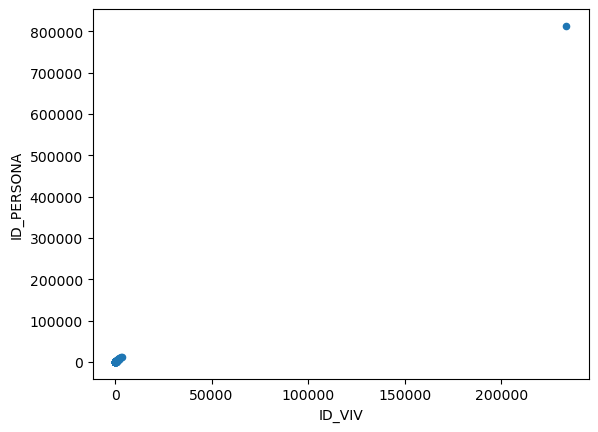

In [14]:
conteos.plot(x ="ID_VIV", y = "ID_PERSONA", kind="scatter")


Generamos una segunda visualización eliminando este elemento, que claramente es un valor atípico.

Observamos una clara correlación entre las variables, pero elegir el umbral donde los valores se consideran atípicos no es una tarea sencilla

<AxesSubplot: xlabel='ID_VIV', ylabel='ID_PERSONA'>

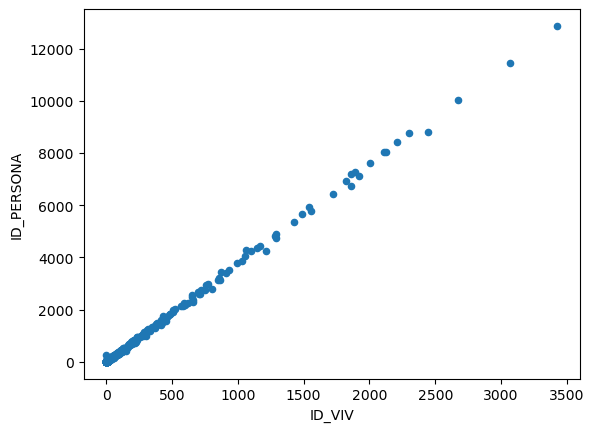

In [15]:
conteos_2 = conteos.drop(index="0001")
conteos_2.plot(x ="ID_VIV", y = "ID_PERSONA", kind="scatter")

<AxesSubplot: >

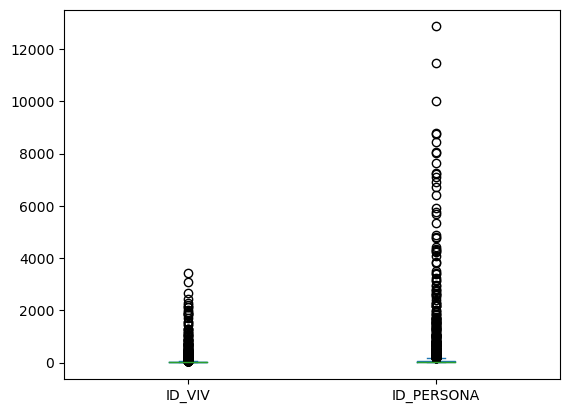

In [16]:
conteos_2.plot(kind="box")

Una aproximación común es utilizar la distancia intercuartílica (IQR) multiplicada por 1.5 o 2 para definir los valores normales.

In [17]:
Q1 = conteos["ID_VIV"].quantile(0.25)
Q3 = conteos["ID_VIV"].quantile(0.75)
IQR = Q3 -Q1
print(Q1,Q3,IQR)
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior,limite_superior)

1.0 19.0 18.0
-26.0 46.0


In [18]:
conteos_3 = conteos[(conteos["ID_VIV"] < limite_superior) & (limite_inferior < conteos["ID_VIV"])]["ID_VIV"]
conteos_3

LOC
0195    35
0208    45
0215    37
0226    39
0229    34
        ..
5683     1
5695     1
5704     1
5711     1
5853     1
Name: ID_VIV, Length: 1471, dtype: int64

<AxesSubplot: >

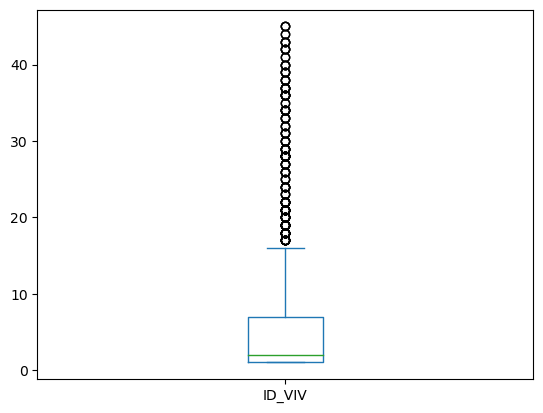

In [19]:
conteos_3.plot(kind="box")

Otra aproximación es el cálculo del Z-score, que mide la desviación de un valor con respecto a una distribución normal estándar. Se consideran valores normales aquellos que se encuentran dentro de 3 desviaciones estándar de la media, que es cero.



In [20]:
conteos_4 = conteos [zscore(conteos["ID_VIV"]).abs() < 3]["ID_VIV"]  ##Tres desviaciones estandar
conteos_4

LOC
0002    3070
0003    3425
0004    2297
0005    2675
0006    2110
        ... 
5683       1
5695       1
5704       1
5711       1
5853       1
Name: ID_VIV, Length: 1771, dtype: int64

<AxesSubplot: >

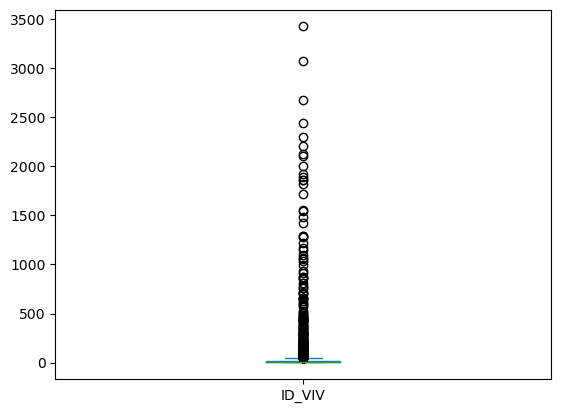

In [21]:
conteos_4.plot(kind="box")   
## la cima esta cargada a la derecha, no cumple una desviación estandar, por ello el z-score no funcionó

También es posible encontrar valores atípicos en relación a otras variables. Una aproximación es generar una función utilizando regresión de mínimos cuadrados, que nos indica un valor esperado y podemos compararlo con el valor obtenido.

In [22]:
X = conteos_2["ID_VIV"].values.reshape(-1, 1)
Y = conteos_2["ID_PERSONA"].values.reshape(-1, 1)

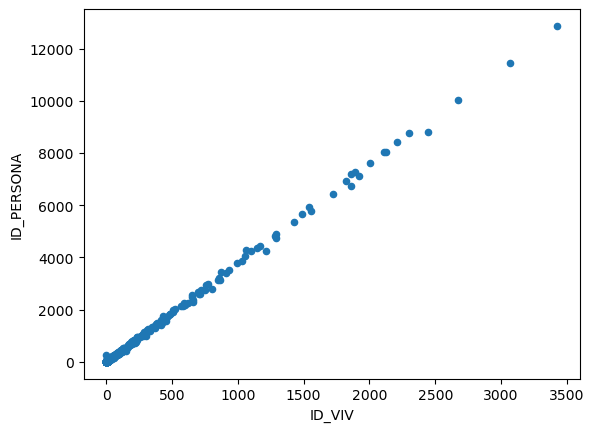

In [23]:
ax = conteos.drop(index="0001").plot(x ="ID_VIV", y = "ID_PERSONA", kind="scatter")

In [24]:
regr = linear_model.LinearRegression(fit_intercept= True, copy_X=True)
regr.fit(X,Y)
print(regr.intercept_,regr.coef_)

[-0.91457854] [[3.75465251]]


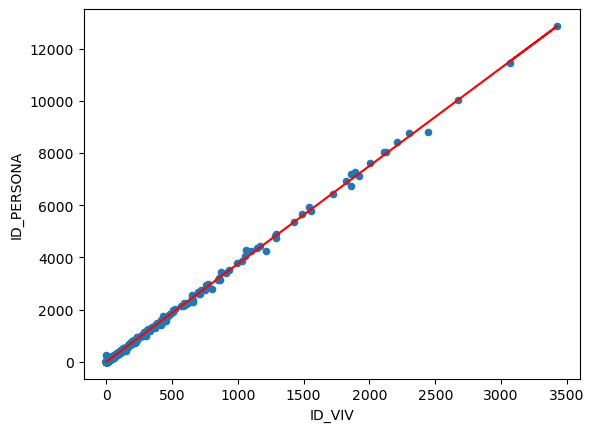

In [25]:
ax.plot(X,regr.predict(X),c="r")
ax.figure

In [26]:
conteos_5 = conteos_2.copy()
conteos_5["pred_ID_PERSONA"] = regr.predict(X)
conteos_5["diferencia"] = conteos_5["pred_ID_PERSONA"] - conteos_5["ID_PERSONA"]
conteos_5

,ID_VIV,ID_PERSONA,pred_ID_PERSONA,diferencia
LOC,,,,
0002,3070,11450,11525.868638,75.868638
0003,3425,12867,12858.770280,-8.229720
0004,2297,8761,8623.522245,-137.477755
0005,2675,10027,10042.780895,15.780895
0006,2110,8043,7921.402225,-121.597775
...,...,...,...,...
5683,1,6,2.840074,-3.159926
5695,1,2,2.840074,0.840074
5704,1,1,2.840074,1.840074


<AxesSubplot: ylabel='Frequency'>

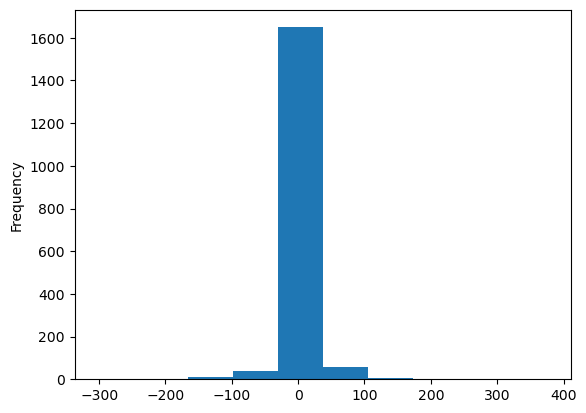

In [27]:
conteos_5["diferencia"].plot(kind="hist")

Al igual que con los valores faltantes, podemos optar por eliminar los registros que contengan valores atípicos, o reemplazar estos valores por elementos dentro del rango de valores normales.

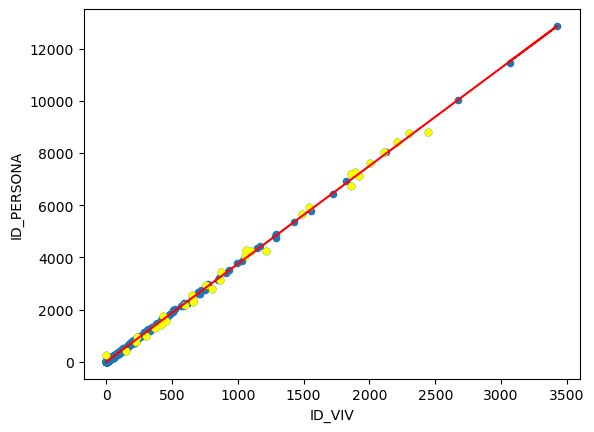

In [29]:
conteos_5 [zscore(conteos_5["diferencia"]).abs() > 3].plot(x ="ID_VIV", y = "ID_PERSONA", ax=ax, kind="scatter", c="yellow")
ax.figure

In [30]:
conteos_5.loc[zscore(conteos_5["diferencia"]).abs() > 3,"ID_PERSONA"] = conteos_5.loc[zscore(conteos_5["diferencia"]).abs() > 3,"pred_ID_PERSONA"]

<AxesSubplot: xlabel='ID_VIV', ylabel='ID_PERSONA'>

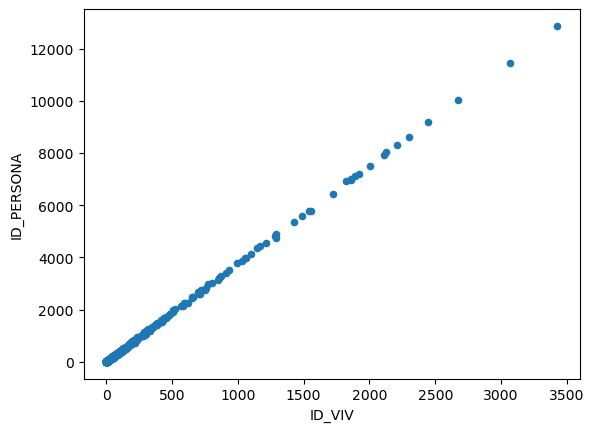

In [31]:
conteos_5.plot(x ="ID_VIV", y = "ID_PERSONA", kind="scatter")

## Transformación de formatos
Pandas ofrece el tipo de dato categórico para las columnas, el cual presenta algunas ventajas sobre los elementos de tipo entero o carácter. Una de las mayores ventajas es la reducción de la memoria utilizada para almacenar la tabla de datos.

In [32]:
personas_interes_8 = personas_interes.copy()
personas_interes_8["SEXO"] = pd.Categorical( personas_interes_8["SEXO"])
personas_interes_8["PARENT"] = pd.Categorical( personas_interes_8["PARENT"])

In [33]:
print(personas_interes.memory_usage())
print(personas_interes_8.memory_usage())

Index              132
ID_PERSONA    10060048
SEXO          10060048
PARENT        10060048
EDAD          10060048
ESCOACUM      10060048
dtype: int64
Index              132
ID_PERSONA    10060048
SEXO           1257630
PARENT         1257886
EDAD          10060048
ESCOACUM      10060048
dtype: int64


In [34]:
print(personas_interes_8['SEXO'])

0          1
1          3
2          1
3          3
4          3
          ..
1257501    3
1257502    1
1257503    1
1257504    3
1257505    1
Name: SEXO, Length: 1257506, dtype: category
Categories (2, object): ['1', '3']


In [40]:
personas_interes_8.dtypes

ID_PERSONA      object
SEXO          category
PARENT        category
EDAD             int64
ESCOACUM       float64
dtype: object

Una vez que tenemos variables categóricas, es necesario transformarlas para que puedan ser aprovechadas en sistemas de aprendizaje automático. En el caso de variables en las que no importa el orden o la distancia entre valores, es necesario realizar una codificación especial llamada "one-hot encoding" (codificación one-hot). Esta técnica transforma los datos en una serie de columnas, cada una representando uno de los valores posibles de la variable. Un valor de 1 indica que el valor está presente en la variable, mientras que un valor de 0 indica lo contrario.

In [41]:
pd.get_dummies( personas_interes_8[["SEXO","PARENT"]])

,SEXO_1,SEXO_3,PARENT_01,PARENT_02,PARENT_03,PARENT_04,PARENT_05,PARENT_06,PARENT_07,PARENT_08,PARENT_09,PARENT_99
0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1257501,0,1,0,0,1,0,0,0,0,0,0,0
1257502,1,0,1,0,0,0,0,0,0,0,0,0
1257503,1,0,0,0,1,0,0,0,0,0,0,0
1257504,0,1,0,1,0,0,0,0,0,0,0,0


Además, podemos obtener información secundaria a partir de ciertas variables. Por ejemplo, podemos obtener la entidad a la que pertenece un registro, suponiendo que esta información no esté disponible inicialmente.

In [42]:
personas_interes["ID_PERSONA"].str.slice(0,2)

0          21
1          21
2          21
3          14
4          14
           ..
1257501    14
1257502    14
1257503    21
1257504    21
1257505    21
Name: ID_PERSONA, Length: 1257506, dtype: object

## Ejercicio

Calcula el porcentaje de años estudiados por individuo